In [20]:
% matplotlib inline
from synapses import reader
from synapses import cleaner
from synapses import manipulator
from synapses import classifier
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
df = reader.read_csv('data/credit-data.csv', index_col='PersonID')


## Exploration
Are there variables with null values?

In [3]:
df.isnull().any()

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

What is the distribution of some of the variables?

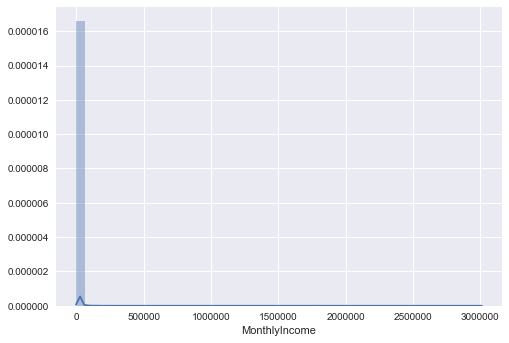

In [4]:
cleaner.fill_in_column_using_mean(df,['MonthlyIncome'],inplace=True)
cleaner.fill_in_column_using_mean(df,['NumberOfDependents'], inplace=True)
sns.distplot(df['MonthlyIncome'])

What's going on with that?

In [5]:
df['MonthlyIncome'].sort_values(inplace=False, ascending=False).head(10)

PersonID
73764     3008750.0
137141    1794060.0
111366    1560100.0
50641     1072500.0
122544     835040.0
123292     730483.0
93565      702500.0
96550      699530.0
119137     649587.0
37079      629000.0
Name: MonthlyIncome, dtype: float64

In [6]:
cleaner.cap_values(df,'MonthlyIncome',700000)

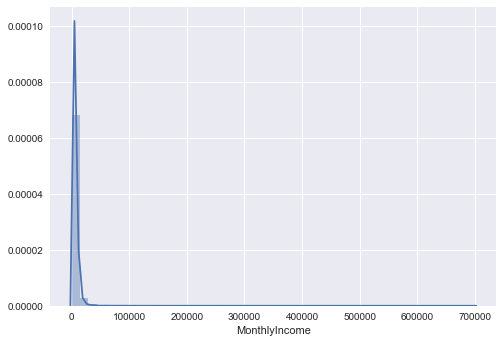

In [7]:
sns.distplot(df['MonthlyIncome'])

Let's see the correlations

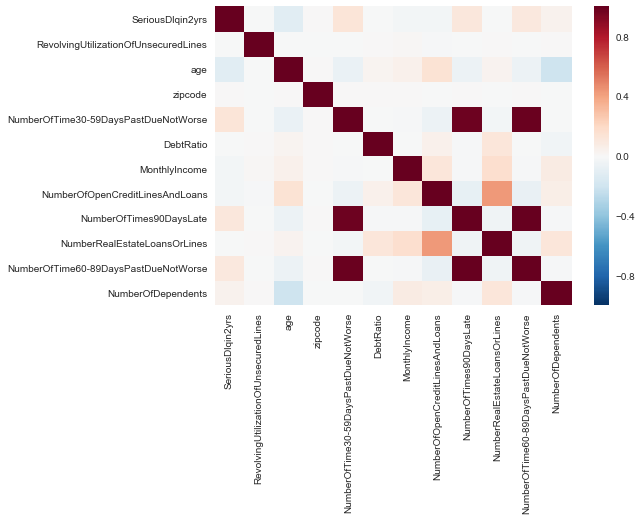

In [8]:
sns.heatmap(df.corr())

## Feature engineering
It doesn't appear evident to me that I should bin any of the variables but for demonstration purposes let's see what that looks like in the dataframe.

In [9]:

manipulator.continuous_to_bins(df,8,['MonthlyIncome'], inplace=False)[['MonthlyIncome','MonthlyIncome_bin']].head(20)


,MonthlyIncome,MonthlyIncome_bin
PersonID,,
1,9120.000000,"(7400, 10000]"
2,2600.000000,"(2593.875, 3903]"
3,3042.000000,"(2593.875, 3903]"
4,3300.000000,"(2593.875, 3903]"
5,63588.000000,"(10000, 700000]"
6,3500.000000,"(2593.875, 3903]"
7,6670.221237,"(6600, 6670.221]"
8,3500.000000,"(2593.875, 3903]"
9,6670.221237,"(6600, 6670.221]"


In [10]:
manipulator.category_to_dummies(df, ['NumberOfDependents']).head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,...,NumberOfDependents_3.0,NumberOfDependents_4.0,NumberOfDependents_5.0,NumberOfDependents_6.0,NumberOfDependents_7.0,NumberOfDependents_8.0,NumberOfDependents_9.0,NumberOfDependents_10.0,NumberOfDependents_13.0,NumberOfDependents_20.0
PersonID,,,,,,,,,,,,,,,,,,,,,
1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,...,0,0,0,0,0,0,0,0,0,0
2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,...,0,0,0,0,0,0,0,0,0,0


## Logistic regression
I'll use all the variables as features and evaluate a logistic regression.

In [11]:
features = df.drop('SeriousDlqin2yrs', axis=1, inplace=False).columns.values.tolist()

In [12]:
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'zipcode',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [16]:
features = df.drop('SeriousDlqin2yrs', axis=1, inplace=False).columns.values.tolist()
model = classifier.get_trained_model(df, features, 'SeriousDlqin2yrs')

In [17]:
classifier.predict(model, df, features)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,score
PersonID,,,,,,,,,,,,,
1,1,0.766127,45,60644,2,0.802982,9120.000000,13,0,6,0,2.000000,0
2,0,0.957151,40,60637,0,0.121876,2600.000000,4,0,0,0,1.000000,0
3,0,0.658180,38,60601,1,0.085113,3042.000000,2,1,0,0,0.000000,0
4,0,0.233810,30,60601,0,0.036050,3300.000000,5,0,0,0,0.000000,0
5,0,0.907239,49,60625,1,0.024926,63588.000000,7,0,1,0,0.000000,0
6,0,0.213179,74,60629,0,0.375607,3500.000000,3,0,1,0,1.000000,0
7,0,0.305682,57,60637,0,5710.000000,6670.221237,8,0,3,0,0.000000,0
8,0,0.754464,39,60625,0,0.209940,3500.000000,8,0,0,0,0.000000,0
9,0,0.116951,27,60804,0,46.000000,6670.221237,2,0,0,0,0.757222,0


In [18]:
df.score.value_counts()

0    149736
1       264
Name: score, dtype: int64

In [21]:
accuracy_score(df['SeriousDlqin2yrs'], df['score'], normalize=True)

0.93332000000000004